In [ ]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import matplotlib.pyplot as plt

Helper functions for Question 1 below:

In [ ]:
#function to extract and combine stock data for the period between 2020 to 2021
def combine_data_2020_2021(df):

    #get data for the year 2020
    df_2020 = df[ df["Year"] == 2020 ]
    df_2020 = df_2020.reset_index(drop=True)

    #get data for the year 2021
    df_2021 = df[ df["Year"] == 2021 ]
    df_2021 = df_2021.reset_index(drop=True)

    #combine data from both these years
    df = pd.concat([df_2020,df_2021],ignore_index=True)

    return df

In [ ]:
#function to carry out inertia trading strategy
def inertia_trading(df):

    #dataframe that holds daily profit data of conducting day trading
    df_trade_results = pd.DataFrame(columns=['Profit','Position'])

    #amount gained by selling stock at closing price
    amount_gained = 0

    #amount spent on buying stock at closing price
    amount_spent = 0

    #variable to store daily profit percentage
    profit = 0

    #iterating over rows in dataframe using index
    #iterating over records of stock for 2020
    for ind in df.index:

        #do not buy in first week and make sure to not exceed the number of trading days ( 503 according to dataset ).
        if ind >= 0 and ind < 503:


            #Case 1: Positive Overnight Return (buy long at opening and sell short at closing)
            if(df["Close"][ind] < df["Open"][ind+1]):

                ###############################################################

                #buying 100 dollars worth of shares
                shares_to_buy = 100/df["Open"][ind+1]


                #selling stock at the end of the day at its closing price
                amount_gained = shares_to_buy*df["Close"][ind+1]



                #################################################################
                profit = (100/df["Open"][ind+1]) * (df["Close"][ind+1] - df["Open"][ind+1])

                df_trade_results = df_trade_results.append({'Profit':profit,'Position':'Long'},ignore_index= True)



            #Case 2: Negative Overnight Return (sell short at opening and buy at closing)
            elif(df["Close"][ind] > df["Open"][ind+1]):


                ################################################################

                #calculating number of stocks to sell
                shares_to_sell = 100/df["Open"][ind+1]

                #decreasing principal amount by accounting for cost of purchasing stock
                amount_spent = shares_to_sell*df["Close"][ind+1]


                ##################################################################
                profit = (100/df["Open"][ind+1]) * (df["Open"][ind+1] - df["Close"][ind+1])

                df_trade_results = df_trade_results.append({'Profit':profit, 'Position':'Short'},ignore_index= True)

    return df_trade_results


In [ ]:
#loading whole of SPY data for 5 years
df_SPY = pd.read_csv("/Volumes/GoogleDrive/My Drive/Data Science Eugene Pinsky/Homework_4/Solution/SPY.csv")
#extracting out data for 2020 to 2021 using helper function
df_SPY= combine_data_2020_2021(df_SPY)

#similar to approach used above
df_NVDA = pd.read_csv("/Volumes/GoogleDrive/My Drive/Data Science Eugene Pinsky/Homework_4/Solution/NVDA.csv")
df_NVDA= combine_data_2020_2021(df_NVDA)

In [ ]:
#running inertia trading algorithm on both stocks
df_SPY_results = inertia_trading(df_SPY)
df_NVDA_results = inertia_trading(df_NVDA)

Question 1.

In [ ]:
#getting mean of Daily Profit for SPY
average_SPY = df_SPY_results["Profit"].mean()
print("Average Daily Profit Percentage of SPY stock is: " + str(round(average_SPY,2))+ "%")

Average Daily Profit Percentage of SPY stock is: 0.03%


In [ ]:
#getting mean of Daily Profit for NVDA
average_NVDA = df_NVDA_results["Profit"].mean()
print("Average Daily Profit Percentage of NVDA stock is: " + str(round(average_NVDA,2))+ "%")

Average Daily Profit Percentage of NVDA stock is: 0.09%


Question 2.

In [ ]:
#storing results for long positions
df_long_SPY =  df_SPY_results[df_SPY_results['Position'] == "Long"]
#storing results for short positions
df_short_SPY = df_SPY_results[df_SPY_results['Position'] == "Short"]
print("Average Daily Profit of SPY stock by selling short is: " + str(round(df_short_SPY.mean()[0],3))+ "%")
print("Average Daily Profit of SPY stock by buying long is: " + str(round(df_long_SPY.mean()[0],2))+ "%")

Average Daily Profit of SPY stock by selling short is: -0.003%
Average Daily Profit of SPY stock by buying long is: 0.05%


In [ ]:
#storing results for long positions
df_long_NVDA =  df_NVDA_results[df_NVDA_results['Position'] == "Long"]
#storing results for short positions
df_short_NVDA = df_NVDA_results[df_NVDA_results['Position'] == "Short"]
print("Average Daily Profit of NVDA stock by selling short is: " + str(round(df_short_NVDA.mean()[0],2))+ "%")
print("Average Daily Profit of NVDA stock by buying long is: " + str(round(df_long_NVDA.mean()[0],2))+ "%")

Average Daily Profit of NVDA stock by selling short is: -0.02%
Average Daily Profit of NVDA stock by buying long is: 0.16%


Question 3.

Helper function for question 3.

In [ ]:
#function to carry out inertia trading strategy
def restrictive_inertia_trading(df):

    #dataframe to store averages of profit for the 100 values from 0 to 10%
    df_average_trade_results = pd.DataFrame(columns=['Average Profit','Threshold'])

    #amount gained by selling stock at closing price
    amount_gained = 0

    #amount spent on buying stock at closing price
    amount_spent = 0

    #variable to store daily profit percentage
    profit = 0

    #iterating over 100 values between 0 to 10%
    for i in np.arange(0.0,10.1,0.1):

        #dataframe that holds daily profit data of conducting day trading
        df_trade_results = pd.DataFrame(columns=['Profit'])

        #iterating over rows in dataframe using index
        #iterating over records of stock for 2020
        for ind in df.index:

            #do not buy in first week and make sure to not exceed the number of trading days ( 503 according to dataset ).
            if ind >= 0 and ind < 503:


                #Retstriction: if absolute value of overnight return is greater than i%
                if abs( 100 * ((df['Close'][ind] - df['Open'][ind+1]) / df['Close'][ind] )) > i:

                    #Case 1: Positive Overnight Return (buy long at opening and sell short at closing)
                    if(df["Close"][ind] < df["Open"][ind+1]):

                        ###############################################################

                        #buying 100 dollars worth of shares
                        shares_to_buy = 100/df["Open"][ind+1]


                        #selling stock at the end of the day at its closing price
                        amount_gained = shares_to_buy*df["Close"][ind+1]


                        #################################################################
                        profit = (100/df["Open"][ind+1]) * (df["Close"][ind+1] - df["Open"][ind+1])

                        df_trade_results = df_trade_results.append({'Profit':profit},ignore_index= True)


                    #Case 2: Negative Overnight Return (sell short at opening and buy at closing)
                    elif(df["Close"][ind] > df["Open"][ind+1]):


                        ################################################################

                        #calculating number of stocks to sell
                        shares_to_sell = 100/df["Open"][ind+1]

                        #decreasing principal amount by accounting for cost of purchasing stock
                        amount_spent = shares_to_sell*df["Close"][ind+1]


                        ##################################################################
                        profit = (100/df["Open"][ind+1]) * (df["Open"][ind+1] - df["Close"][ind+1])

                        df_trade_results = df_trade_results.append({'Profit':profit},ignore_index= True)

        #average profit for each threshold stored here
        df_average_trade_results = df_average_trade_results.append({'Average Profit':df_trade_results.mean()[0] ,'Threshold':i},ignore_index=True)


    return df_average_trade_results

In [ ]:
def plot_line_graph(df,x,y):

    #finding record with max value for average profit per trade
    max= y.argmax()

    #plotting graph for threshold value versus average profit per trade
    fig, ax = plt.subplots()
    ax.plot(x,y)
    plt.xlabel("Threshold in %")
    plt.ylabel("Average profit per trade in %")
    plt.yticks(np.arange(0.0,10.1,0.5))
    plt.xticks(np.arange(0.0,10.1,0.5))
    plt.rcParams["figure.figsize"] = (10,10)
    plt.vlines(df.loc[max][1], 0, df.loc[max][0], linestyle="dashed")
    plt.hlines(df.loc[max][0], 0, df.loc[max][1], linestyle="dashed")
    plt.scatter(df.loc[max][1], 0, df.loc[max][0], zorder=2)
    plt.xlim(0,None)
    plt.ylim(0,None)
    plt.show()

In [ ]:
#carrying out inertia trading strategy with added restriction on both stocks
df_SPY_results = restrictive_inertia_trading(df_SPY)
df_NVDA_results = restrictive_inertia_trading(df_NVDA)

Analysis for SPY stock.

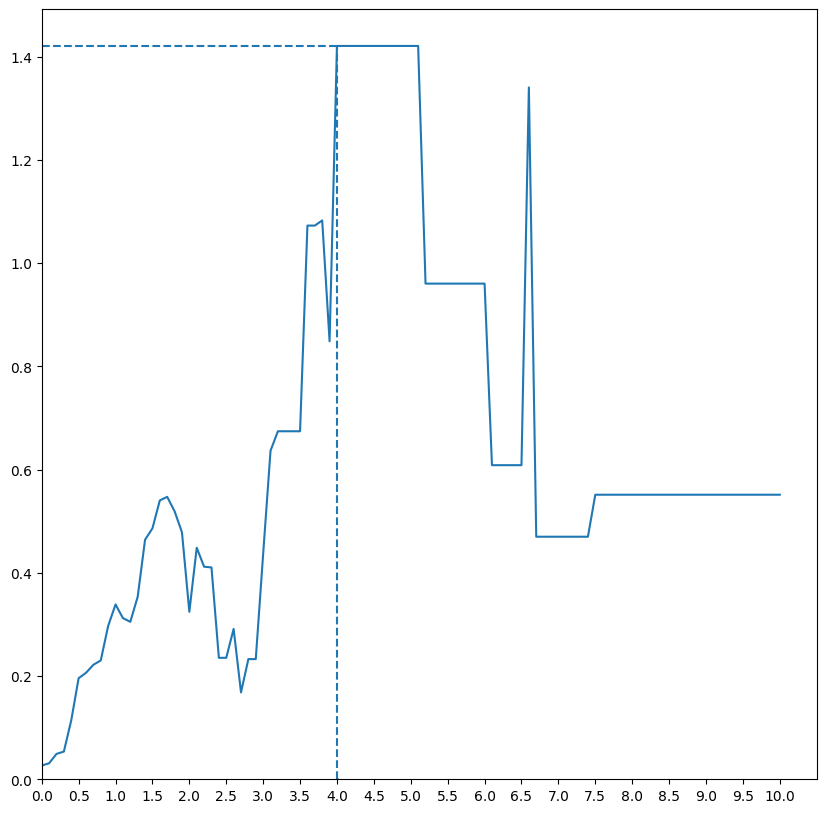

In [ ]:
plot_line_graph(df_SPY_results,df_SPY_results["Threshold"],df_SPY_results["Average Profit"])

In [ ]:
#finding optimal value for x
df_SPY_results.loc[df_SPY_results["Average Profit"].argmax()]

Average Profit    1.421158
Threshold         4.000000
Name: 40, dtype: float64

In [ ]:
#making the above output cleaner
print("The maximum average profit per trade is : "+ str(round(df_SPY_results.loc[df_SPY_results["Average Profit"].argmax()][0],2)))
print("For which the threshold is required to be at : "+ str(round(df_SPY_results.loc[df_SPY_results["Average Profit"].argmax()][1],2)))

The maximum average profit per trade is : 1.42
For which the threshold is required to be at : 4.0


Analysis for NVDA stock.

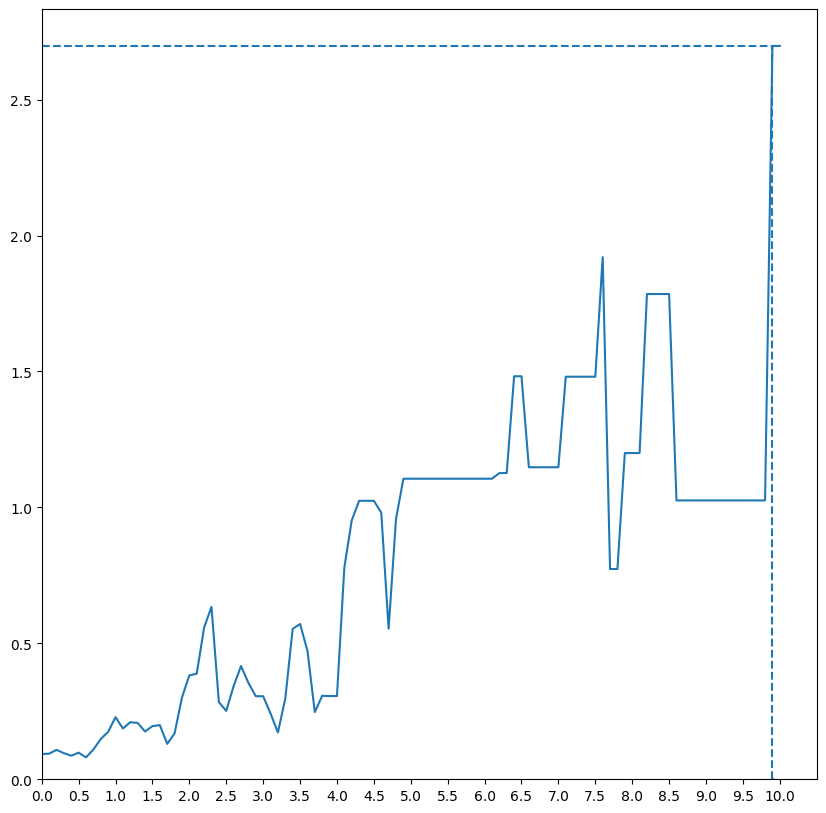

In [ ]:
plot_line_graph(df_NVDA_results,df_NVDA_results["Threshold"],df_NVDA_results["Average Profit"])

In [ ]:
#finding optimal value for x
df_NVDA_results.loc[df_NVDA_results["Average Profit"].argmax()]

Average Profit    2.697488
Threshold         9.900000
Name: 99, dtype: float64

In [ ]:
#making the above output cleaner
print("The maximum average profit per trade is : "+ str(round(df_NVDA_results.loc[df_NVDA_results["Average Profit"].argmax()][0],2)))
print("For which the threshold is required to be at : "+ str(round(df_NVDA_results.loc[df_NVDA_results["Average Profit"].argmax()][1],2)))

The maximum average profit per trade is : 2.7
For which the threshold is required to be at : 9.9


Question 4.

Helper functions for question 4.

In [ ]:
#function to carry out inertia trading strategy for long position
def restrictive_inertia_trading_long(df):

    #dataframe to store averages of profit for the 100 values from 0 to 10%
    df_average_trade_results = pd.DataFrame(columns=['Average Profit','Threshold'])

    #amount gained by selling stock at closing price
    amount_gained = 0

    #amount spent on buying stock at closing price
    amount_spent = 0

    #variable to store daily profit percentage
    profit = 0

    #iterating over 100 values between 0 to 10%
    for i in np.arange(0.0,10.1,0.1):

        #dataframe that holds daily profit data of conducting day trading
        df_trade_results = pd.DataFrame(columns=['Profit'])

        #iterating over rows in dataframe using index
        #iterating over records of stock
        for ind in df.index:

            #do not buy in first week and make sure to not exceed the number of trading days ( 503 according to dataset ).
            if ind >= 0 and ind < 503:


                #Retstriction: if absolute value of overnight return is greater than i%
                if abs( 100 * ((df['Close'][ind] - df['Open'][ind+1]) / df['Close'][ind] )) > i:

                    #Case 1: Positive Overnight Return (buy long at opening and sell short at closing)
                    if(df["Close"][ind] < df["Open"][ind+1]):

                        ###############################################################

                        #buying 100 dollars worth of shares
                        shares_to_buy = 100/df["Open"][ind+1]


                        #selling stock at the end of the day at its closing price
                        amount_gained = shares_to_buy*df["Close"][ind+1]


                        #################################################################
                        profit = (100/df["Open"][ind+1]) * (df["Close"][ind+1] - df["Open"][ind+1])

                        df_trade_results = df_trade_results.append({'Profit':profit},ignore_index= True)


                    #Case 2: Negative Overnight Return (sell short at opening and buy at closing)
                    elif(df["Close"][ind] > df["Open"][ind+1]):


                        ################################################################

                        #calculating number of stocks to sell
                        shares_to_sell = 100/df["Open"][ind+1]

                        #decreasing principal amount by accounting for cost of purchasing stock
                        amount_spent = shares_to_sell*df["Close"][ind+1]

                        ##################################################################
                        profit = (100/df["Open"][ind+1]) * (df["Open"][ind+1] - df["Close"][ind+1])

                        #commented this out since we are getting averages to test out buy long strategy
                        #df_trade_results = df_trade_results.append({'Profit':profit},ignore_index= True)

        #average profit
        df_average_trade_results = df_average_trade_results.append({'Average Profit':df_trade_results.mean()[0] ,'Threshold':i},ignore_index=True)


    return df_average_trade_results

In [ ]:
#function to carry out inertia trading strategy for short position
def restrictive_inertia_trading_short(df):

    #dataframe to store averages of profit for the 100 values from 0 to 10%
    df_average_trade_results = pd.DataFrame(columns=['Average Profit','Threshold'])

    #amount gained by selling stock at closing price
    amount_gained = 0

    #amount spent on buying stock at closing price
    amount_spent = 0

    #variable to store daily profit percentage
    profit = 0

    #iterating over 100 values between 0 to 10%
    for i in np.arange(0.0,10.1,0.1):

        #dataframe that holds daily profit data of conducting day trading
        df_trade_results = pd.DataFrame(columns=['Profit'])

        #iterating over rows in dataframe using index
        #iterating over records of stock
        for ind in df.index:

            #do not buy in first week and make sure to not exceed the number of trading days ( 503 according to dataset ).
            if ind >= 0 and ind < 503:


                #Retstriction: if absolute value of overnight return is greater than i%
                if abs( 100 * ((df['Close'][ind] - df['Open'][ind+1]) / df['Close'][ind] )) > i:

                    #Case 1: Positive Overnight Return (buy long at opening and sell short at closing)
                    if(df["Close"][ind] < df["Open"][ind+1]):

                        ###############################################################

                        #buying 100 dollars worth of shares
                        shares_to_buy = 100/df["Open"][ind+1]


                        #selling stock at the end of the day at its closing price
                        amount_gained = shares_to_buy*df["Close"][ind+1]


                        #################################################################
                        profit = (100/df["Open"][ind+1]) * (df["Close"][ind+1] - df["Open"][ind+1])

                        #commented this out since we are interested in observing short position
                        #df_trade_results = df_trade_results.append({'Profit':profit},ignore_index= True)


                    #Case 2: Negative Overnight Return (sell short at opening and buy at closing)
                    elif(df["Close"][ind] > df["Open"][ind+1]):


                        ################################################################

                        #calculating number of stocks to sell
                        shares_to_sell = 100/df["Open"][ind+1]

                        #decreasing principal amount by accounting for cost of purchasing stock
                        amount_spent = shares_to_sell*df["Close"][ind+1]

                        ##################################################################
                        profit = (100/df["Open"][ind+1]) * (df["Open"][ind+1] - df["Close"][ind+1])

                        #commented this out since we are getting averages to test out buy long strategy
                        df_trade_results = df_trade_results.append({'Profit':profit},ignore_index= True)

        #average profit
        df_average_trade_results = df_average_trade_results.append({'Average Profit':df_trade_results.mean()[0] ,'Threshold':i},ignore_index=True)


    return df_average_trade_results

Analysis of long position.

In [ ]:
#carrying out long position along with restriction for both stocks.
df_SPY_results = restrictive_inertia_trading_long(df_SPY)
df_NVDA_results = restrictive_inertia_trading_long(df_NVDA)

I. SPY stock.

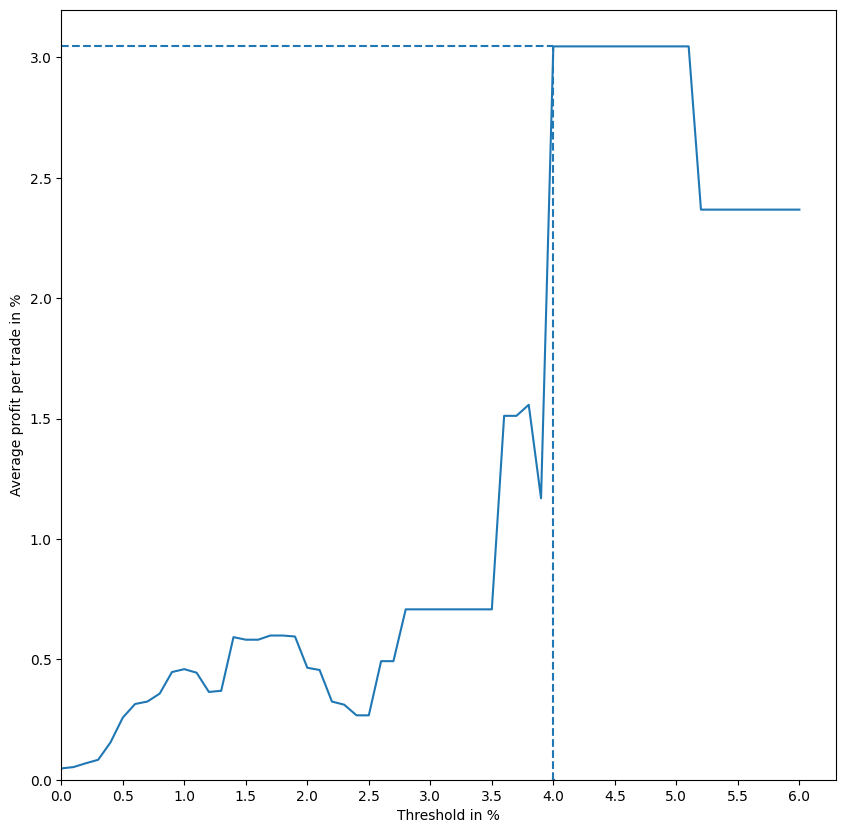

In [ ]:
plot_line_graph(df_SPY_results,df_SPY_results["Threshold"],df_SPY_results["Average Profit"])

In [ ]:
#finding optimal value for x
df_SPY_results.loc[df_SPY_results["Average Profit"].argmax()]

Average Profit    3.046048
Threshold         4.000000
Name: 40, dtype: float64

In [ ]:
#making the above output cleaner
print("The maximum average profit per trade is : "+ str(round(df_SPY_results.loc[df_SPY_results["Average Profit"].argmax()][0],2)))
print("For which the threshold is required to be at : "+ str(round(df_SPY_results.loc[df_SPY_results["Average Profit"].argmax()][1],2)))

The maximum average profit per trade is : 3.05
For which the threshold is required to be at : 4.0


II. NVDA stock.

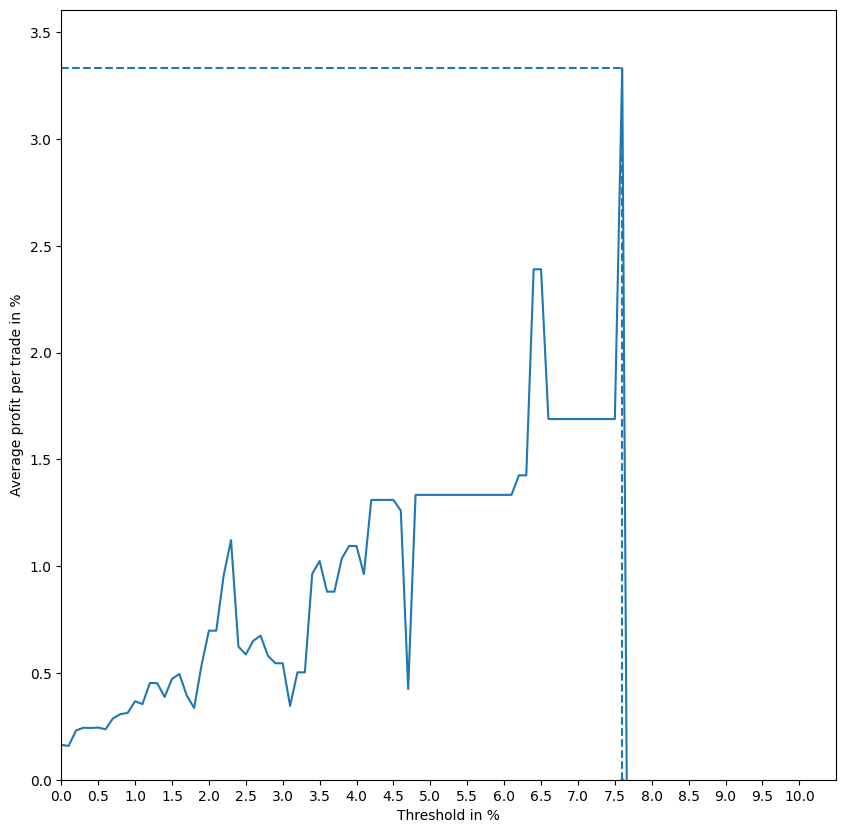

In [ ]:
plot_line_graph(df_NVDA_results,df_NVDA_results["Threshold"],df_NVDA_results["Average Profit"])

In [ ]:
#finding optimal value for x
df_NVDA_results.loc[df_NVDA_results["Average Profit"].argmax()]

Average Profit    3.332757
Threshold         7.600000
Name: 76, dtype: float64

In [ ]:
#making the above output cleaner
print("The maximum average profit per trade is : "+ str(round(df_NVDA_results.loc[df_NVDA_results["Average Profit"].argmax()][0],2)))
print("For which the threshold is required to be at : "+ str(round(df_NVDA_results.loc[df_NVDA_results["Average Profit"].argmax()][1],2)))

The maximum average profit per trade is : 3.33
For which the threshold is required to be at : 7.6


Analysis of short position.

In [ ]:
#carrying out long position along with restriction for both stocks.
df_SPY_results = restrictive_inertia_trading_short(df_SPY)
df_NVDA_results = restrictive_inertia_trading_short(df_NVDA)

I. SPY stock.

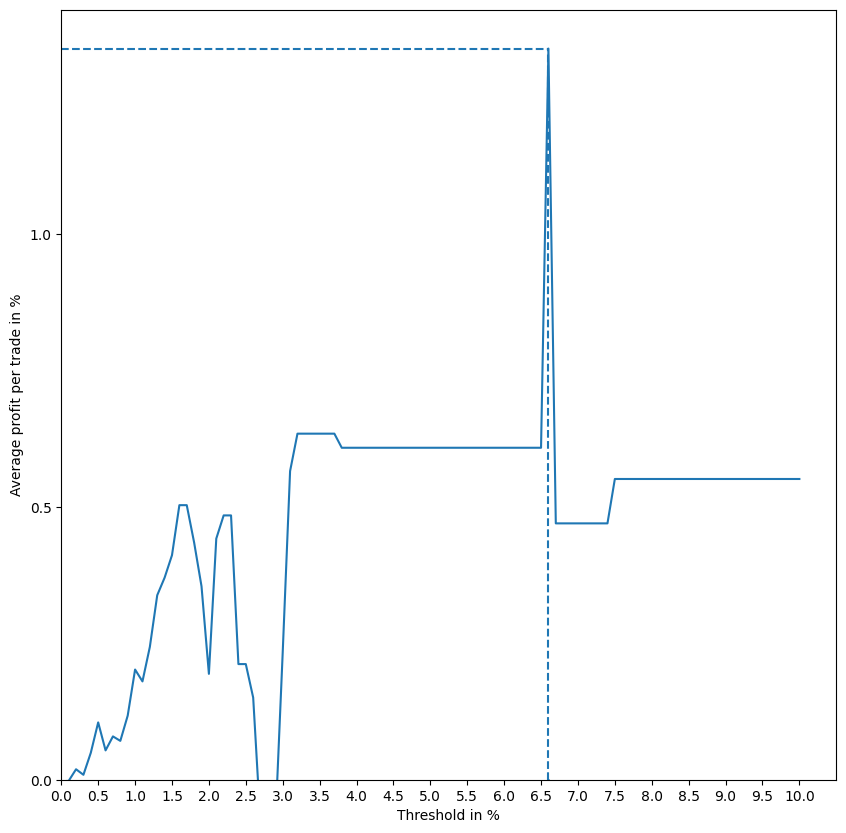

In [ ]:
plot_line_graph(df_SPY_results,df_SPY_results["Threshold"],df_SPY_results["Average Profit"])

In [ ]:
#making the above output cleaner
print("The maximum average profit per trade is : "+ str(round(df_SPY_results.loc[df_SPY_results["Average Profit"].argmax()][0],2)))
print("For which the threshold is required to be at : "+ str(round(df_SPY_results.loc[df_SPY_results["Average Profit"].argmax()][1],2)))

The maximum average profit per trade is : 1.34
For which the threshold is required to be at : 6.6


II. NVDA stock.

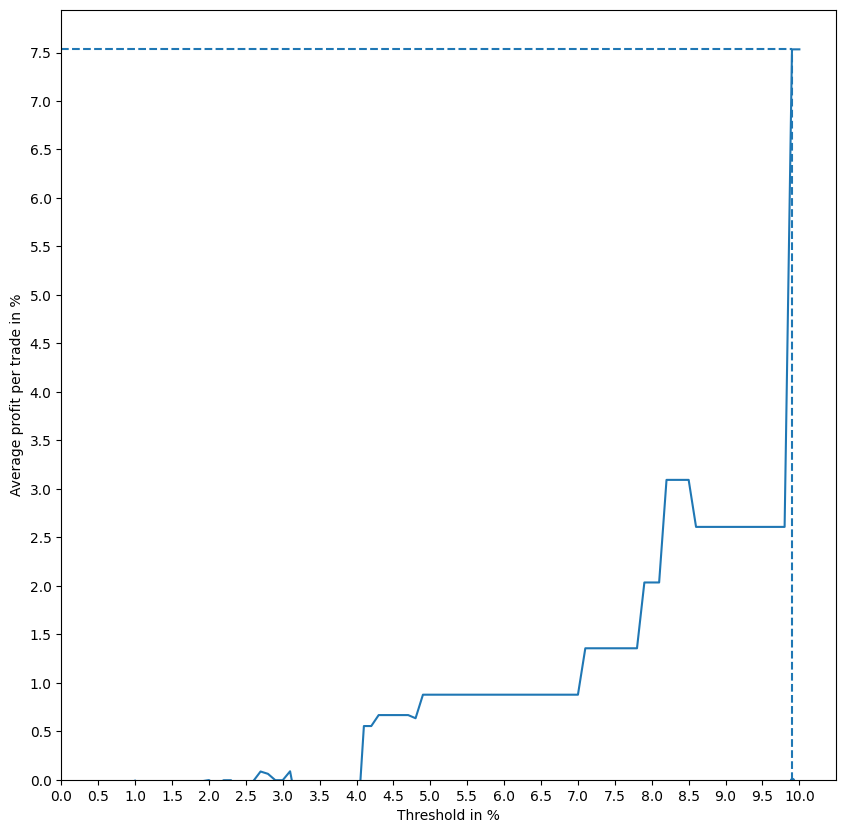

In [ ]:
plot_line_graph(df_NVDA_results,df_NVDA_results["Threshold"],df_NVDA_results["Average Profit"])

In [ ]:
#making the above output cleaner
print("The maximum average profit per trade is : "+ str(round(df_NVDA_results.loc[df_NVDA_results["Average Profit"].argmax()][0],2)))
print("For which the threshold is required to be at : "+ str(round(df_NVDA_results.loc[df_NVDA_results["Average Profit"].argmax()][1],2)))

The maximum average profit per trade is : 7.53
For which the threshold is required to be at : 9.9


Question 5.

Helper function for question 5.

In [ ]:
def plot_bar_graph(df):
    #creating dataframe to store open prices
    open_prices = pd.DataFrame()
    open_prices["Opening Price"] = df["Open"]

    #extracting last digit in below 2 lines
    open_prices["Last digit"] = open_prices["Opening Price"].map(str).str.split('.').str[1].astype(int)
    open_prices["Last digit"] = open_prices["Last digit"] %10

    #getting count of each digit
    open_prices = open_prices["Last digit"].value_counts()
    open_prices = open_prices.to_frame()
    open_prices = open_prices.reset_index()
    open_prices = open_prices.rename(columns={"index":"Last Digit","Last digit":"Frequency"})
    open_prices = open_prices.sort_values(by="Last Digit",ignore_index=True)
    #code to plot the bar graph
    fig, ax = plt.subplots(figsize =(8, 8))
    ax.bar(open_prices["Last Digit"],open_prices["Frequency"])
    plt.xlabel("Last Digit at cents position")
    plt.ylabel("Frequency")
    plt.xticks(range(0,10,1))
    plt.show()

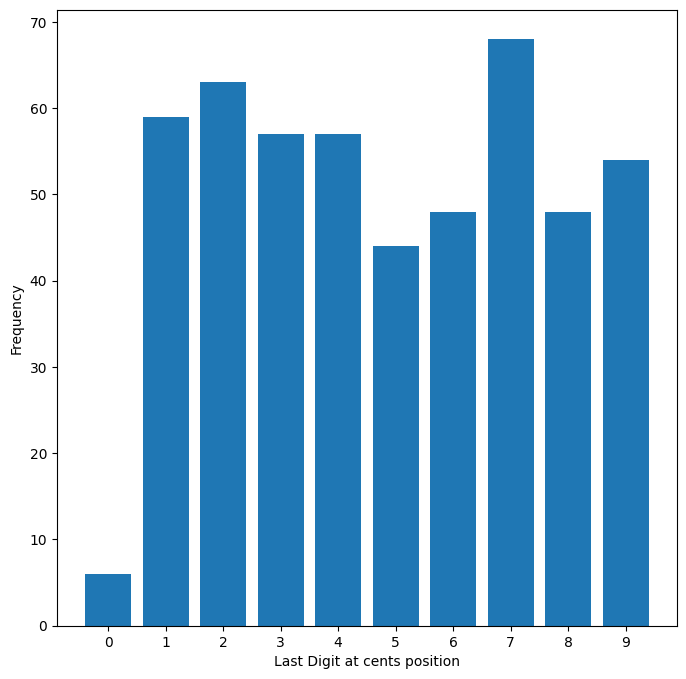

In [ ]:
plot_bar_graph(df_SPY)

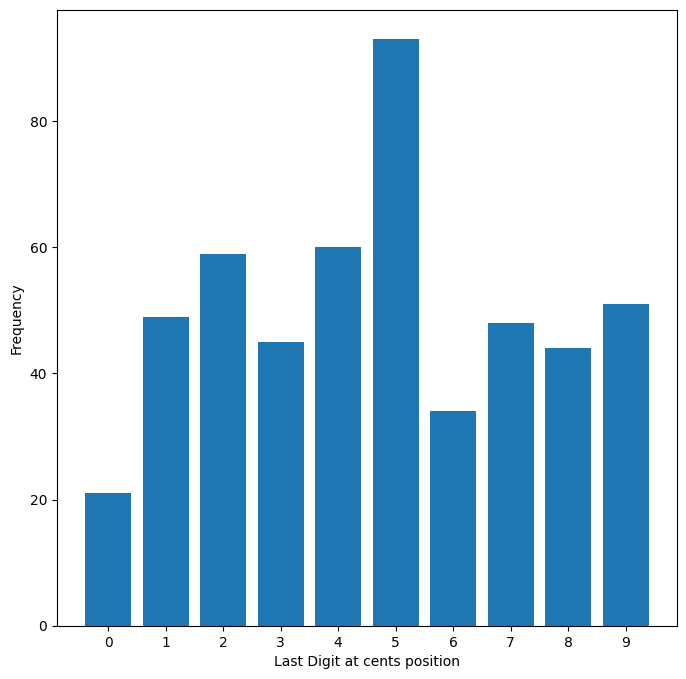

In [ ]:
plot_bar_graph(df_NVDA)